In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms

from torch.utils.data import DataLoader


In [23]:
# Dataset download
mnist_train = dsets.MNIST(root = "MNIST_data/", train = True, transform=transforms.ToTensor(), download = True)
mnist_test = dsets.MNIST(root = "MNIST_data/", train = False, transform=transforms.ToTensor(), download = True)

fashion_train = dsets.FashionMNIST(root = "Fashion_data", train = True, transform=transforms.ToTensor(), download= True)
fashion_test = dsets.FashionMNIST(root = "Fashion_data", train = False, transform=transforms.ToTensor(), download= True)



# train과 test directory로 담기
# 2000개씩 담아내면 됌 -> 2000개 * 20(클래스) = 40,000개 데이터

# 그리고 나머지 것들중 100개씩 test로 담는다고 생각해보자.
# 100개씩 담아내면 됌 -> 100개 * 20(클래스) = 2,000개 데이터


# Custom한 데이터셋을 만들고, 정규화를 시켜봅시다.


In [156]:
from torch.utils.data import Dataset

# dataset만들기
class CustomDataset(Dataset):
    def __init__(self, X, Y, transform = None):
        self.x_data = X
        self.y_data = Y
        self.transform = transform
        
    def __len__(self):
        return len(self.x_data)
    
    def __getitem__(self,idx):
        # x,y가 이미 Tensor Type으로 존재함.

        x = self.x_data[idx]
        y = self.y_data[idx]
        
        if self.transform:
            x = self.transform(x)
            y = self.transform(y)
     
        
        return x,y

# transform
'''
질문: 왜 255를 나누는 것일까?

mnist_train.data.float().mean() / 255
mnist_train.data.float().std() / 255

'''

trans = transforms.Compose([
    transforms.ToTensor(),
    transforms. ((0.1306), (0.3081))
])
    
dataset = CustomDataset(mnist_train.data, mnist_train.targets, transform = None)


In [261]:
mu = (mnist_train.data.float().mean() /255 + fashion_train.data.float().mean() /255) /2
std = (mnist_train.data.float().std() / 255 + fashion_train.data.float().std() /255) / 2


In [263]:
mu

tensor(0.2083)

# 순서를 다시 세워보자.
(1) 일단 데이터를 저장하는게 먼저이고, (2) 그 다음에 커스텀 데이터셋을 만들고, (3)데이터 로더를 만드는 과정이구나.

In [199]:
# Dataset download
mnist_train = dsets.MNIST(root = "MNIST_data/", train = True, transform=transforms.ToTensor(), download = True)
mnist_test = dsets.MNIST(root = "MNIST_data/", train = False, transform=transforms.ToTensor(), download = True)

fashion_train = dsets.FashionMNIST(root = "Fashion_data", train = True, transform=transforms.ToTensor(), download= True)
fashion_test = dsets.FashionMNIST(root = "Fashion_data", train = False, transform=transforms.ToTensor(), download= True)



# train과 test directory로 담기
# 2000개씩 담아내면 됌 -> 2000개 * 20(클래스) = 40,000개 데이터

# 그리고 나머지 것들중 100개씩 test로 담는다고 생각해보자.
# 100개씩 담아내면 됌 -> 100개 * 20(클래스) = 2,000개 데이터


In [168]:
num_imags = [1]*21

In [179]:
# mnist데이터 저장.
num_imags = [1]*21
for sample in mnist_train:
    img, label = sample
    if num_imags[label] > 2000:
        continue
    
    # tensor를 이미지로 변환
    PIL_img = transforms.ToPILImage()(img)
    # 클래스번호/사진번호로 저장
    PIL_img.save("./train/%d/%d.jpeg"%(label,num_imags[label]))
    # 카운트
    num_imags[label] += 1

    

In [216]:
# fashion_mnist 저장.
for sample in fashion_train:
    img,label = sample
    label += 10
    if num_imags[label] > 2000:
        continue
    
    PIL = transforms.ToPILImage()(img)
    PIL.save('./train/%d/%d.jpeg'%(label, num_imags[label]))
    num_imags[label] += 1


In [220]:
# Test
test_images = [1]*21
for sample in mnist_test:
    img, label = sample
    if test_images[label] > 1000:
        continue
    
    PIL = transforms.ToPILImage()(img)
    PIL.save("./test/%d/%d.jpeg"%(label, test_images[label]))
    test_images[label] += 1

for sample in fashion_test:
    img, label = sample
    label += 10
    if test_images[label] > 1000:
        continue
    PIL2 = transforms.ToPILImage()(img)
    PIL2.save("./test/%d/%d.jpeg"%(label, test_images[label]))
    test_images[label] += 1

print(test_images)


[981, 1001, 1001, 1001, 983, 893, 959, 1001, 975, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1]


# Image Folder를 이용해서, 해당 데이터를 가져오기

In [224]:
# ImageFolder 이용
train_data = torchvision.datasets.ImageFolder(root = "./train/", transform = transforms.ToTensor())
test_data = torchvision.datasets.ImageFolder(root = "./test/", transform = transforms.ToTensor())



# Custom Data를 이용해서, 해당 데이터를 가져오기
폴더안에 있는 값들을 어떻게 읽어 올 수 있을지 고민해봅시다.

In [382]:
from torch.utils.data import Dataset

# dataset만들기
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform = None):
        
        self.root_dir = root_dir
        self.transform = transform
        self.x = []
        self.y = []
        
        # 디렉토리 (20개)
        for i in range(20):
            init_path = self.root_dir + "/" + str(i) + "/"

            # 디렉토리 내부(폴더당 2000개씩)
            for j in range(2000):
                img_path = init_path + os.listdir(init_path)[j] #이미지의 Path
                img = io.imread(img_path) #실제 이미지 읽어오기
                
                # 추가
                self.x.append(img)
                self.y.append([i])
                break
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self,idx):
        
        x = self.x[idx]
        y = self.y[idx]
        
        if self.transform:
            x = transforms.ToPILImage()(x) #이미지로 변환
            x = self.transform(x)
#             x = transforms.ToTensor()(x) #다시 Tensor로 변환.
            
            
        x = torch.FloatTensor(x)
        y = torch.FloatTensor(y)

        return x,y
        
        


# transform
trans = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        
    
    
])

dataset = CustomDataset(root_dir = "./train", transform = trans )




In [383]:
dataset.__getitem__(0)[0].shape

torch.Size([1, 224, 224])

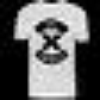

In [364]:

d = dataset.__getitem__(10)[0]

t = transforms.ToPILImage()(d)

transforms.Resize((100,100))(t)


In [338]:
root_dir = "./test"

init_path = root_dir+ "/" + str(1) + "/"

init_path




'./test/1/'

In [301]:
img_name = "./train/1/" + os.listdir("./train/1")[1000]

img = torch.FloatTensor(io.imread(img_name))

In [333]:
# 디렉토리 (20개)
x = []
y = []

for i in range(20):
    init_path = "./train/" + str(i) + "/"
    
    # 디렉토리 내부(폴더당 2000개씩)
    for j in range(2000):
        img_path = init_path+ os.listdir(init_path)[j]
        img = io.imread(img_path)
    
        x.append(img)
        y.append([i])
        
        
        t = transforms.ToPILImage()(img)
        display(t)
        
        break
    

        

    

#os.listdir("./train")

In [330]:
# Dataset 상속
class CustomDataset(Dataset): 
  def __init__(self):
    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]

  # 총 데이터의 개수를 리턴
  def __len__(self): 
    return len(self.x_data)

  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
  def __getitem__(self, idx): 
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

20

In [334]:
x

[array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   0,
           2,   2,   0,   0,  16,   0,   0,   6,   0,   0,   4,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   6,   0,   0,
           4,   4,   0,   7,   9,   0,   5,   6,   0,   1,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   6,   0,   0,   3,   3,
           0,   0,   4,   0,   0,   0,   3,   1,   0,   6,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   4,
           0,   0,   4,   0,  13,  10,   4,   1,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   8,  10,   0,   0,
          13,   9,   0,   0,   2,   0,   0,  15,   7,   0,  14,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   5,   0,   0,   5,   0,
           0,   0,  17,  82, 225, 237,  70,   0,   2,   8,   0,   0,   0,
           0

In [335]:
y

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19]]